## P7 Intro to Machine Learning
Author: Derek Fintel, Forensics Analyst II, D555

Contact: s542635@nwmissouri.edu

Release Date: 02/24/2025

Repository: [https://github.com/dfintel25/datafun-07-ml](https://github.com/dfintel25/datafun-07-ml)

### Introduction
Summary statement of objectives. 

### Imports

In [439]:
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


## Part 1 - Charting a Straight Line
Intent.

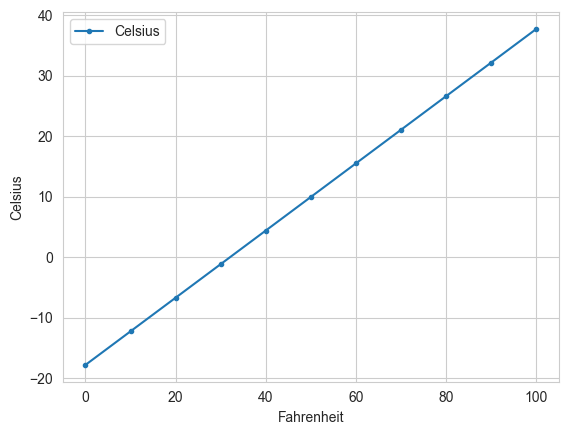

In [440]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [441]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [442]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [443]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [444]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [445]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [446]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

print("Slope =", linear_regression.slope)
print("Intercept =", linear_regression.intercept)
print("Slope * Year 1850 + Intercept =", linear_regression.slope * 1850 + linear_regression.intercept)
print("Slope * Year 2019 + Intercept =", linear_regression.slope * 2019 + linear_regression.intercept)

Slope = 0.014771361132966163
Intercept = 8.694993233674289
Slope * Year 1850 + Intercept = 36.022011329661694
Slope * Year 2019 + Intercept = 38.51837136113297


### Section 6 - Predict

In [447]:
linear_regression.slope * 2024 + linear_regression.intercept
print("Slope * Year 2024 + Intercept =", linear_regression.slope * 2024 + linear_regression.intercept)

Slope * Year 2024 + Intercept = 38.5922281667978


### Section 7 - Visualizations

Y_Limits: (10.0, 70.0)


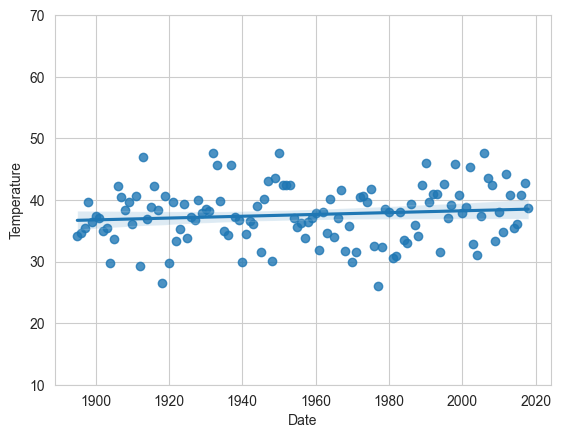

In [448]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
print("Y_Limits:", axes.set_ylim(10, 70))

## Part 3 - Prediction
Intent

### Section 1 - Build the Model

In [ ]:
# Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

print("X_Train of shape =", X_train.shape)
print("X_Test of shape =", X_test.shape)

X_Train of shape = (93, 1)
X_Test of shape = (31, 1)


In [ ]:
# Training the Model
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

print("Linear Regression Coefficient =", linear_regression.coef_)
print(f"Linear Regression Intercept =", linear_regression.intercept_)

Linear Regression Coefficient = [0.01939167]
Linear Regression Intercept = -0.30779820252656975


### Section 2 - Test the Model

In [ ]:
# Testing the Model
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [ ]:
# Predicting Future Temperatures and Estimating Past Temperatures

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

print("1890 Prediction:", predict(1890))
print("2019 Prediction:", predict(2019))
print("2025 Prediction:", predict(2025))

1890 Prediction: [36.34246432]
2019 Prediction: [38.84399018]
2025 Prediction: [38.96034022]


### Section 3 - Visualizations

1889 Prediction: [36.32307265]
2020 Prediction: [38.86338185]
2050 Prediction: [39.44513205]


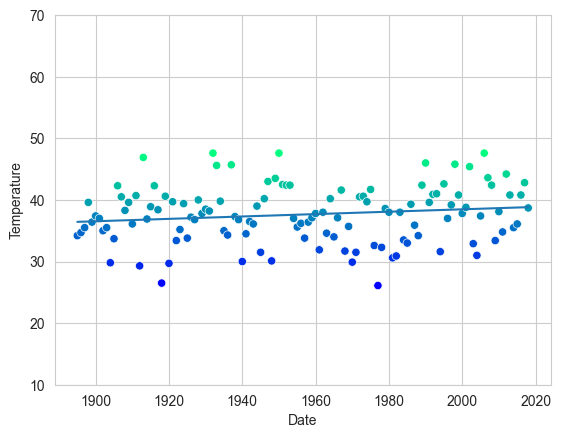

In [ ]:
# Visualizing the Dataset with the Regression Line
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

line = plt.plot(x, y)

# 15.4 Self Check
# Exercise 3
print("1889 Prediction:", predict(1889))
print("2020 Prediction:", predict(2020))
print("2050 Prediction:", predict(2050))

## Part 4 - Summary
Insights